In [115]:
import pandas as pd
import numpy as np
import matplotlib as plt
import struct
from array import array
from os.path  import join
import random
import matplotlib.pyplot as plt

# Load data set
- Shuffle data 
- Flateen data -> (N x D) where D = 784 = 28 * 28 since The neurons only accept 1 D matrix
- Normalise data since pixel images have a value from 0 - 225
    - Normalised data should have a value from 0 - 1 

In [116]:
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)       

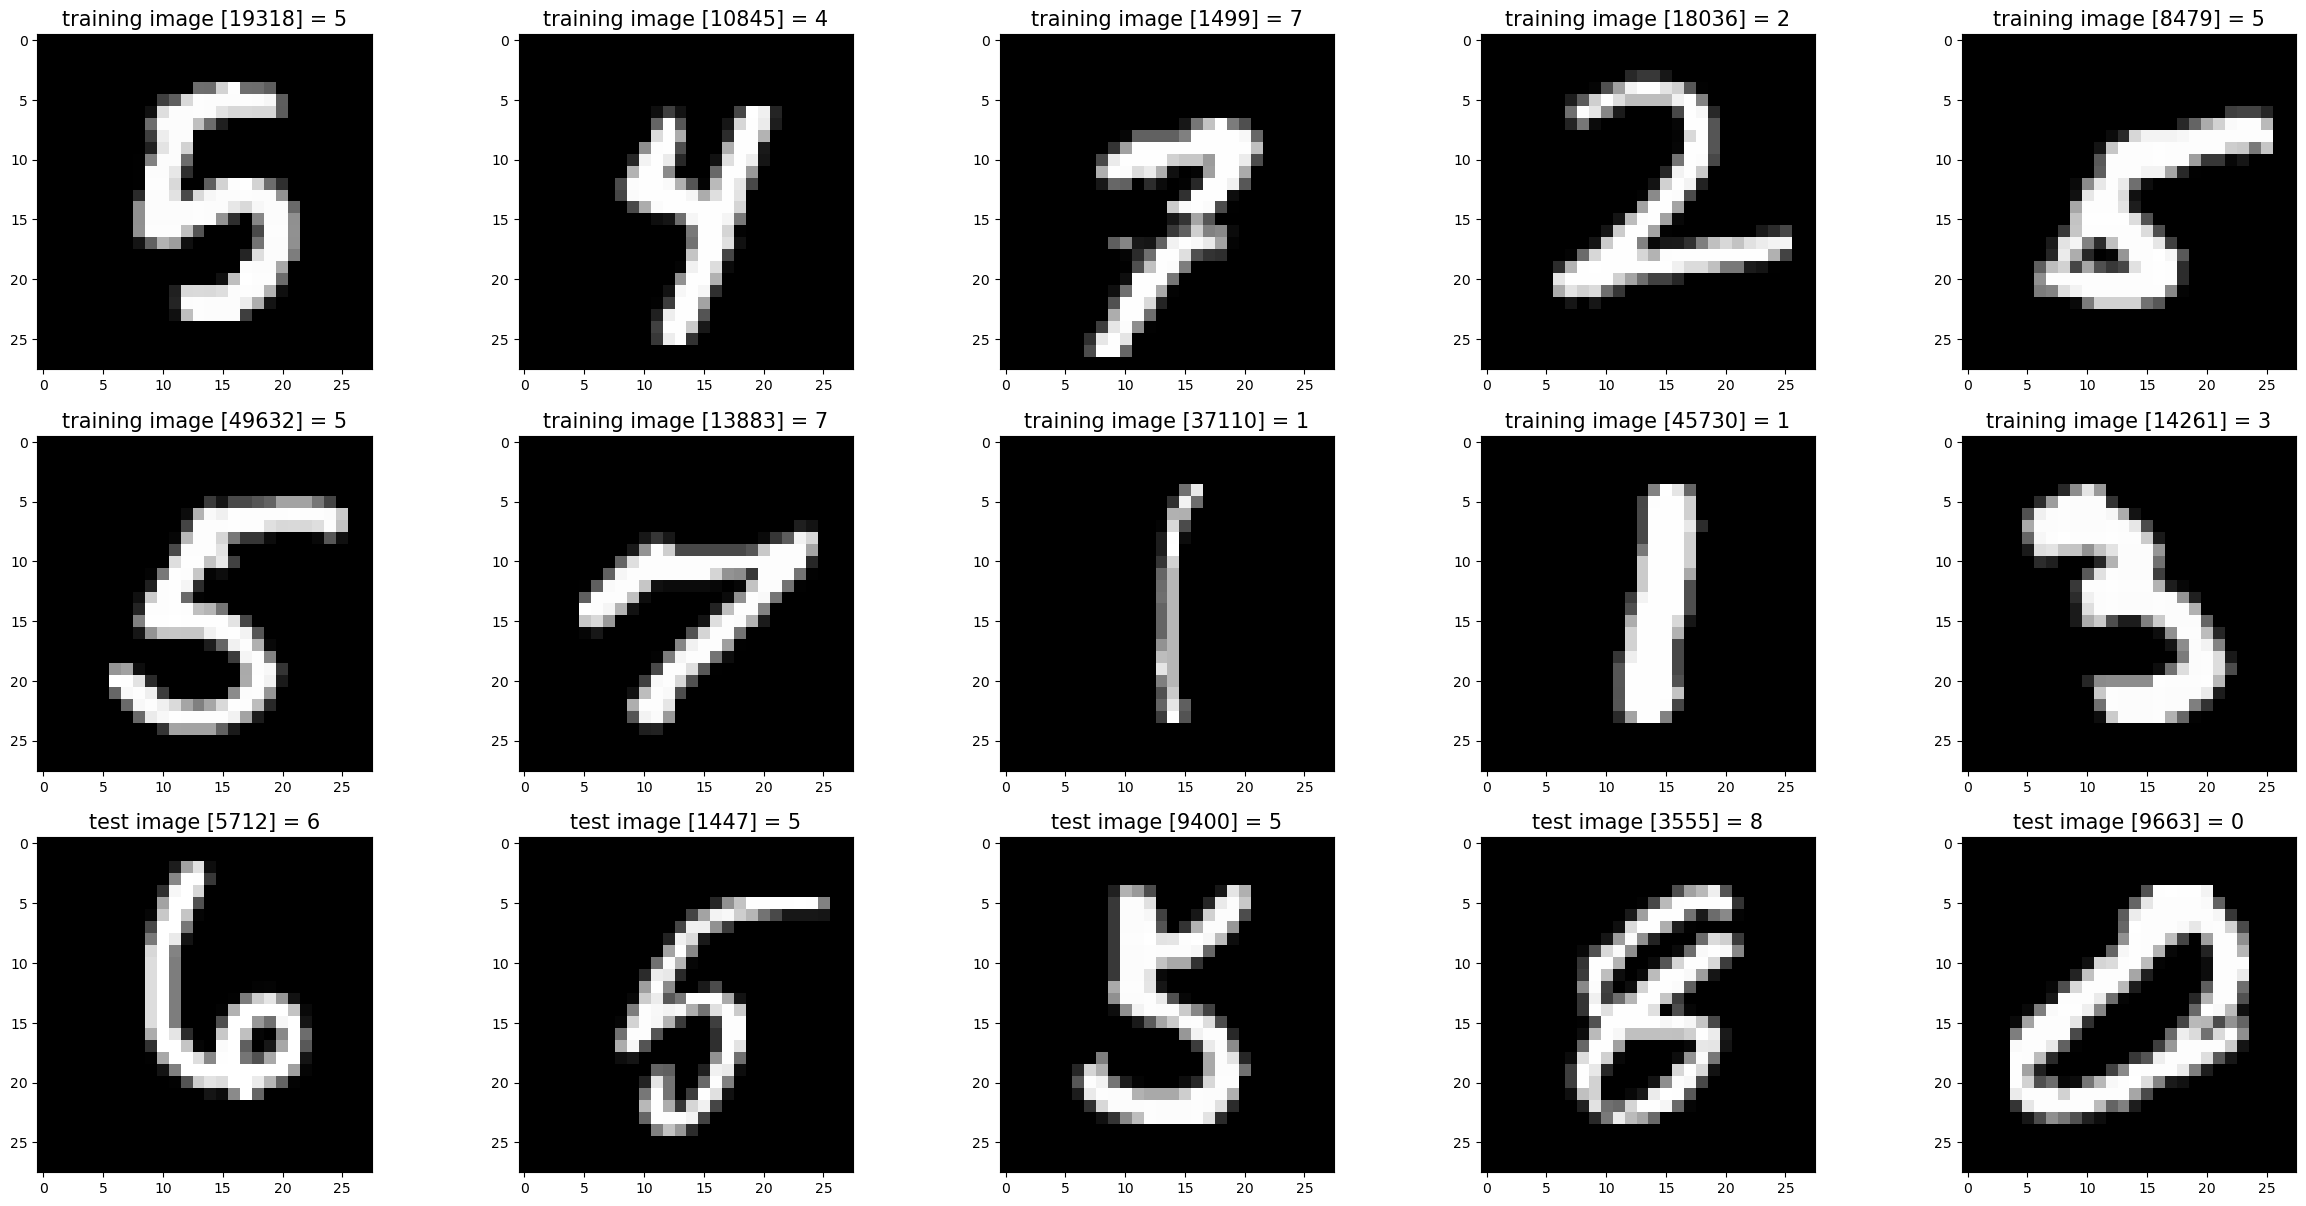

In [117]:
#
# Set file paths based on added MNIST Datasets
#
training_images_filepath = "../mnist/data/train-images.idx3-ubyte"
training_labels_filepath = "../mnist/data/train-labels.idx1-ubyte" 
test_images_filepath = "../mnist/data/t10k-images.idx3-ubyte" 
test_labels_filepath = "../mnist/data/t10k-labels.idx1-ubyte"

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


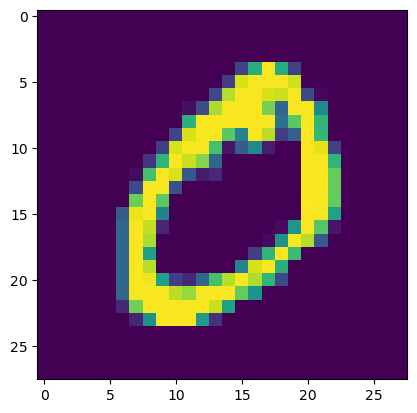

In [118]:
# plt.imshow(x_train[0][0])
# x_train[0] -> (28 x 28) Matrix

def normalise_data(dataset):
    norm_dataset = []
    for image in dataset:
        image_norm = (image / np.linalg.norm(image)).round(3)
        norm_dataset.append(image_norm)
    return norm_dataset

x_train_norm = normalise_data(x_train)
x_test_norm = normalise_data(x_test)

plt.imshow(x_train_norm[1])

# Convert Y labels into a single vector
y_train_binary_label = []

for label in y_train: 
    binary_labels = np.zeros(10)
    binary_labels[label] = 1
    y_train_binary_label.append(binary_labels)
    
print(y_train_binary_label[1])
y_train_binary_label = np.array(y_train_binary_label)


In [119]:
# reshape array to 1 D
x_train_norm = [image.reshape(((28*28))) for image in x_train_norm]
x_train_norm = np.array(x_train_norm)

x_test_norm = [image.reshape(((28*28))) for image in x_test_norm]
x_test_norm = np.array(x_test_norm)

# Train model

In [120]:
# grad_desc functions
# caluclate the gradient of our loss with respect to W and with respect to B -> dldw dldb
def sigmoid(z): 
    return 1/(1+np.exp(-z))

def predict(y):
    return np.argmax(y)

def softmax(numpy_array: np.array):
    # numpy_array, a2 is a vector of size k
    exponential = np.exp(numpy_array)
    return exponential / exponential.sum(axis=1, keepdims=True)

# true_value = y_train[0]
def loss(label_y, model_y):
    log_model_y = np.log(model_y)
    return np.dot(log_model_y.T, label_y).sum()

def grad_w(target, X, y):
    # gradient of loss with respect to weight
    # Basically the partial diff of the loss function and weights, dl/dw
    return X.T.dot(target - y)


def grad_b(target, y):
    # gradient of loss with respect to bias
    # Basically the partial diff of the loss function and bias, dl/dw
    return (target - y).sum(axis=0)

Cost at iteration 0: -7382732.512016
Error rate: 0.9152833333333333
Cost at iteration 10: -8907064.820084
Error rate: 0.43128333333333335
Cost at iteration 20: -10384584.492312
Error rate: 0.3557666666666667
Cost at iteration 30: -11240700.647892
Error rate: 0.26105
Cost at iteration 40: -11919262.741991
Error rate: 0.2313
Cost at iteration 50: -12301527.326107
Error rate: 0.19115
Cost at iteration 60: -12546036.285652
Error rate: 0.15665
Cost at iteration 70: -12801881.536597
Error rate: 0.13741666666666666
Cost at iteration 80: -13078795.326746
Error rate: 0.12928333333333333
Cost at iteration 90: -13352281.184562
Error rate: 0.12486666666666667
Cost at iteration 100: -13607785.305192
Error rate: 0.12191666666666667
Cost at iteration 110: -13842773.038717
Error rate: 0.1196
Cost at iteration 120: -14059212.666136
Error rate: 0.11678333333333334
Cost at iteration 130: -14259509.141066
Error rate: 0.11473333333333334
Cost at iteration 140: -14445718.035834
Error rate: 0.1127
Cost at it

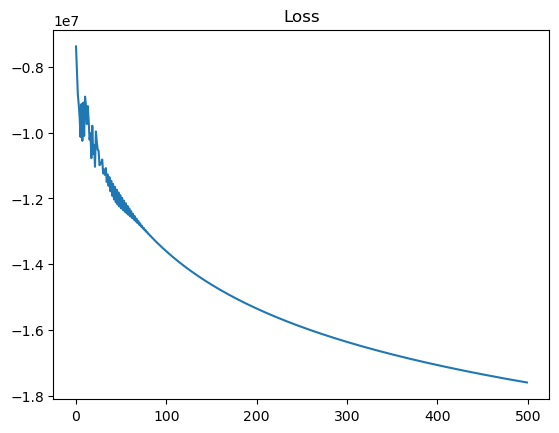

In [134]:
epochs = 500
n, k = x_train_norm.shape # (6000 , 784)
w = np.random.randn(k, 10) # (784, 10)
b = 0
loss_values = []
learning_rate = 0.0004
reg = 0.01
for iteration in range(epochs): 
    # Logistic function 
    y = np.dot(x_train_norm, w) + b
    predict_y = softmax(y)
    # Loss function 
    loss_value = loss(y_train, predict_y)
    loss_values.append(loss_value)

    # gradient descent
    grad_w_value = grad_w(y_train_binary_label, x_train_norm, predict_y)
    grad_b_value = grad_b(y_train_binary_label, predict_y)

    # adjust weights
    w += learning_rate * (grad_w_value - reg * w)
    b += learning_rate * (grad_b_value - reg * b)

    # predict
    prediction = np.argmax(predict_y, axis=1)
    error_rate = np.mean(prediction != y_train)
    if iteration % 10 == 0:
            print("Cost at iteration %d: %.6f" % (iteration, loss_value))
            print("Error rate:", error_rate)

# Test
predict_test_y = np.dot(x_test_norm, w) + b
test_prediction = np.argmax(predict_test_y, axis=1)
test_error_rate = np.mean(test_prediction != y_test)
print(f"Final test accuracy: {(100 - (test_error_rate*100))} %" )


plt.plot(range(len(loss_values)), loss_values)
plt.title("Loss")
plt.show()

